In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Análisis Exploratorio de Datos (EDA)

## Importamos la data y Creamos los DF necesarios para el trabajo:

In [2]:
cantidadxprovi_1 = pd.read_excel('datos_originales/Internet_BAF.xlsx', sheet_name='Dial-BAf')
penetracion_hogares_2 = pd.read_excel('datos_originales/Internet_Penetracion.xlsx', sheet_name='Penetracion-hogares')
velocidad_internet_3 = pd.read_excel('datos_originales/historico_velocidad_internet.xlsx', sheet_name='Velocidad % por prov')
accesos_xtecnologia_4 = pd.read_excel('datos_originales/Internet_Accesos-por-tecnologia.xlsx', sheet_name='Accesos Por Tecnología')
ingresos_5 = pd.read_excel('datos_originales/Internet_Ingresos.xlsx', sheet_name='Ingresos')
mapa_conectividad_6 = pd.read_excel('datos_originales/mapa_conectividad.xlsx')

## Eliminamos filas nulas y duplicadas:

In [3]:
cantidadxprovi_1.dropna(how='all', inplace=True)
penetracion_hogares_2.dropna(how='all', inplace=True)
velocidad_internet_3.dropna(how='all', inplace=True)
accesos_xtecnologia_4.dropna(how='all', inplace=True)
ingresos_5.dropna(how='all', inplace=True)
mapa_conectividad_6.dropna(how='all', inplace=True)

In [4]:
cantidadxprovi_1.drop_duplicates(keep='first', inplace=True)
penetracion_hogares_2.drop_duplicates(keep='first', inplace=True)
velocidad_internet_3.drop_duplicates(keep='first', inplace=True)
accesos_xtecnologia_4.drop_duplicates(keep='first', inplace=True)
ingresos_5.drop_duplicates(keep='first', inplace=True)
mapa_conectividad_6.drop_duplicates(keep='first', inplace=True)

## Análisis de cada DF:

### 1  **cantidadxprovi_1**

#### 1.1 Qué contiene cada columna?

Contiene cantidades de acceso a Internet en diferentes provincias de Argentina desde 2014 hasta 2022.

- **Año:** Año en el que se realizó la medición de la conectividad a Internet.
- **Trimestre:** Trimestre al que corresponde la medición.
- **Provincia:** Nombre de la provincia en la que se realizó la medición.
- **Banda ancha fija:** Número de conexiones de banda ancha fija en la provincia.
- **Dial up:** Número de conexiones de Dial up en la provincia.
- **Total:** Total de conexiones de banda ancha y Dial up en la provincia.

In [5]:
cantidadxprovi_1.head(36)

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
5,2022,4,Córdoba,1049592,68.0,1049660
6,2022,4,Corrientes,155449,4.0,155453
7,2022,4,Entre Ríos,270952,22.0,270974
8,2022,4,Formosa,61840,0.0,61840
9,2022,4,Jujuy,118218,0.0,118218


In [6]:
cantidadxprovi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


#### 1.2 Revisamos 2 entradas faltantes en Dial up:

In [7]:
dialup_nulos = cantidadxprovi_1[cantidadxprovi_1['Dial up'].isna()]
dialup_nulos

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


---> No hay registro de Dial up en Formosa y Misiones, 100% Banda ancha fija para los usuarios que tienen acceso a internet.

#### 1.3 Revisamos que los registros para cada provincia esten ok, 24 provincias con 36 trimestres para cada una. del 2014 al 2022. 

In [8]:
cantidad_valores_unicos_1 = cantidadxprovi_1['Provincia'].nunique()
# Imprimir la cantidad de valores únicos
print(cantidad_valores_unicos_1)

24


In [9]:
valoresunicos_1=cantidadxprovi_1['Provincia'].value_counts()
valoresunicos_1

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64

Hay 24 provincias ->  OK  
36 trimestres cada una -> OK

#### 1.4 Grafico visualizacion de cantidades de acceso a internet x provincia

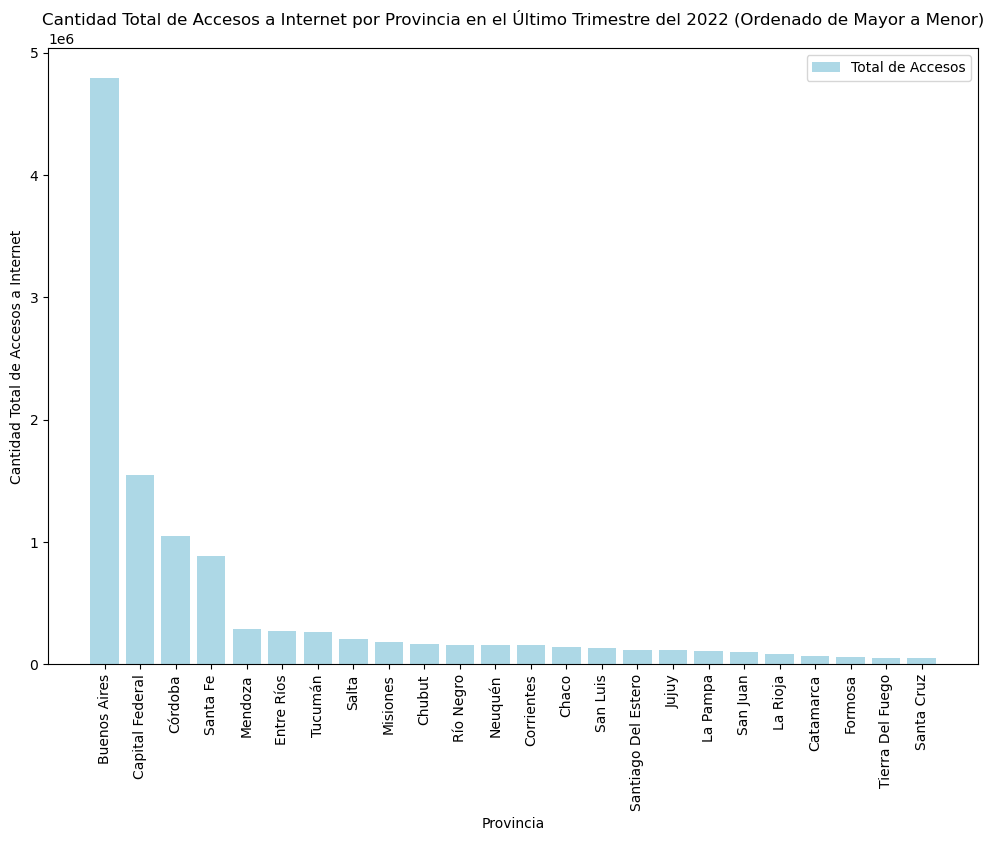

In [10]:
# Agregar una nueva columna que contenga la suma de 'Banda ancha fija' y 'Dial up'
cantidadxprovi_1['Total_Accesos'] = cantidadxprovi_1['Banda ancha fija'] + cantidadxprovi_1['Dial up']

# Filtrar el DataFrame para obtener solo el último trimestre del 2022
df_last_quarter_2022_1 = cantidadxprovi_1[(cantidadxprovi_1['Año'] == 2022) & (cantidadxprovi_1['Trimestre'] == 4)]

# Ordenar los valores de Total_Accesos de mayor a menor
df_last_quarter_2022_sorted_1 = df_last_quarter_2022_1.sort_values('Total_Accesos', ascending=False)

# Crear un gráfico de barras para visualizar la cantidad total de accesos a internet por provincia en el último trimestre del 2022
plt.figure(figsize=(12, 8))
plt.bar(df_last_quarter_2022_sorted_1['Provincia'], df_last_quarter_2022_sorted_1['Total_Accesos'], color='lightblue', label='Total de Accesos')
plt.xlabel('Provincia')
plt.ylabel('Cantidad Total de Accesos a Internet')
plt.title('Cantidad Total de Accesos a Internet por Provincia en el Último Trimestre del 2022 (Ordenado de Mayor a Menor)')
plt.xticks(rotation=90)
plt.legend()
plt.show()




La representación gráfica destaca claramente las diferencias significativas en la cantidad de accesibilidad a internet entre las distintas provincias argentinas durante el último trimestre del 2022.  
Al considerar el análisis, es crucial tener en cuenta que, para una comparación más precisa y equitativa, será fundamental contrastar estos datos con **LA POBLACION TOTAL DE CADA PROVINCIA**. Esto nos permitirá obtener una comprensión más profunda de la equidad en la disponibilidad de servicios de internet, lo que puede ser crucial para el desarrollo y la implementación de políticas que mejoren la conectividad a nivel nacional.  
  Esto lo veremos en el dashboard realizado en este mismo proyecto, en paso posterior al EDA.

### **2 penetracion_hogares_2**

#### 2.1 Qué contiene cada columna?

Contiene cantidades accesos cada 100 hogares a Internet en diferentes provincias de Argentina desde 2014 hasta 2022.

- **Año:** Año en el que se recopilaron los datos de conectividad a Internet.
- **Trimestre:** Trimestre al que corresponden los datos recopilados.
- **Provincia:** Nombre de la provincia en la que se recopilaron los datos.
- **Accesos por cada 100 hogares:** Número de accesos a Internet por cada 100 hogares en la provincia.

In [21]:
penetracion_hogares_2.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.94
1,2022,4,Capital Federal,122.73
2,2022,4,Catamarca,65.77
3,2022,4,Chaco,43.62
4,2022,4,Chubut,85.57


In [17]:
penetracion_hogares_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


No hay datos faltantes

#### 2.2 Revisamos que los registros para cada provincia esten ok, 24 provincias con 36 trimestres para cada una. del 2014 al 2022. 

In [15]:
cantidad_valores_unicos_2 = penetracion_hogares_2['Provincia'].nunique()
# Imprimir la cantidad de valores únicos
print(cantidad_valores_unicos_2)

24


In [18]:
valoresunicos_2=penetracion_hogares_2['Provincia'].value_counts()
valoresunicos_2

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64

Hay 24 provincias ->  OK  
36 trimestres cada una -> OK

#### 2.3 Gráficos de análisis

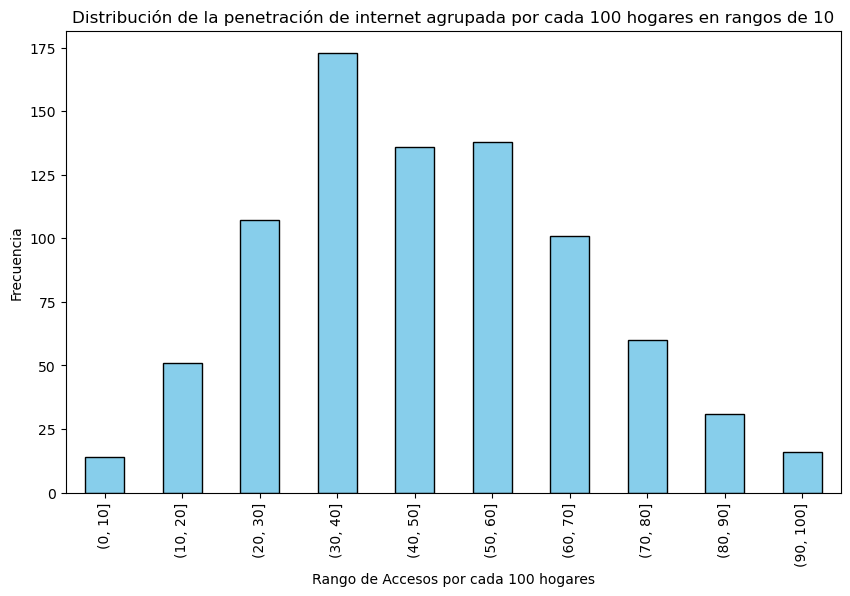

In [25]:
# Agrupar valores en rangos de 10
penetracion_hogares_2['Rango'] = pd.cut(penetracion_hogares_2['Accesos por cada 100 hogares'], bins=range(0, 110, 10))

# Filtrar para el último trimestre de 2022
ultimo_trimestre_2022_2 = penetracion_hogares_2[(penetracion_hogares_2['Año'] == 2022) & (penetracion_hogares_2['Trimestre'] == 4)]

# Visualización de la distribución con valores agrupados
plt.figure(figsize=(10, 6))
penetracion_hogares_2['Rango'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la penetración de internet agrupada por cada 100 hogares en rangos de 10')
plt.xlabel('Rango de Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.show()

Los picos en la distribución que se encuentran entre 30 y 60 podrían indicar que la mayoría de las provincias tienen una penetración de internet relativamente moderada en comparación con el total de hogares.   


A continuacion CHEQUEAMOS ESTA INFO, viendo otro grafico para entender en que porcentaje del total hay ese bajo nivel de % de acceso:

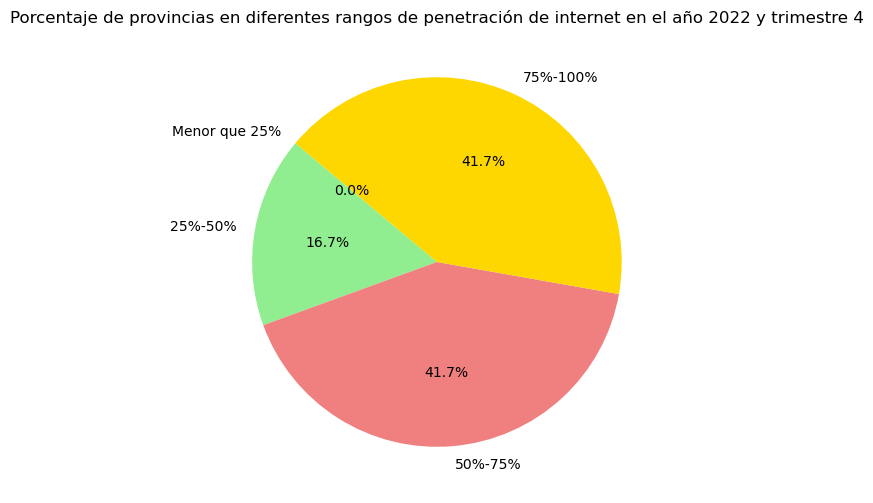

In [26]:
# Filtrar el DataFrame para el año 2022 y trimestre 4
df_ultimo_periodo_2 = penetracion_hogares_2[(penetracion_hogares_2['Año'] == 2022) & (penetracion_hogares_2['Trimestre'] == 4)]

# Definir los rangos
menor_25_2 = df_ultimo_periodo_2[df_ultimo_periodo_2['Accesos por cada 100 hogares'] < 25]['Provincia'].count()
menor_50_2 = df_ultimo_periodo_2[(df_ultimo_periodo_2['Accesos por cada 100 hogares'] >= 25) & (df_ultimo_periodo_2['Accesos por cada 100 hogares'] < 50)]['Provincia'].count()
menor_75_2 = df_ultimo_periodo_2[(df_ultimo_periodo_2['Accesos por cada 100 hogares'] >= 50) & (df_ultimo_periodo_2['Accesos por cada 100 hogares'] < 75)]['Provincia'].count()
entre_75y100_2 = df_ultimo_periodo_2[df_ultimo_periodo_2['Accesos por cada 100 hogares'] >= 75]['Provincia'].count()

# Crear un gráfico de barras
labels = ['Menor que 25%', '25%-50%', '50%-75%', '75%-100%']
sizes = [menor_25_2, menor_50_2, menor_75_2, entre_75y100_2]
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de provincias en diferentes rangos de penetración de internet en el año 2022 y trimestre 4')
plt.show()


Arriba podemos observar que la conclusion CORRECTA seria:
El 16,7 % de las provincias tiene un indice menor al 50% de hogares con acceso a internet.   
El 82,3 % restante se encuentra entre el 50 y 100 %

A continuación hacemos una tendencia temporal del acceso a internet por cada 100 hogares desde 2014 a 2022.

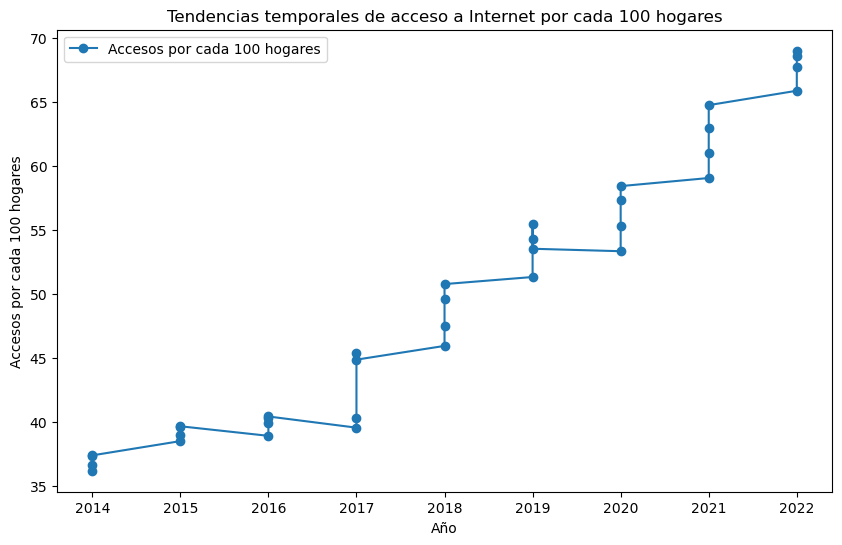

In [29]:
temporal_trends_2 = penetracion_hogares_2.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hogares'].mean()
# Usar reset_index para tener los años y trimestres como columnas
temporal_trends_2 = temporal_trends_2.reset_index()

# Crear una figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar la media de acceso por cada 100 hogares a lo largo del tiempo
ax.plot(temporal_trends_2['Año'], temporal_trends_2['Accesos por cada 100 hogares'], marker='o', linestyle='-', label='Accesos por cada 100 hogares')

# Configurar etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Accesos por cada 100 hogares')
ax.set_title('Tendencias temporales de acceso a Internet por cada 100 hogares')

# Agregar la leyenda y mostrar el gráfico
ax.legend()
plt.show()

El gráfico muestra la tendencia temporal de la penetración de Internet en cada 100 hogares a lo largo del tiempo, sin considerar la ubicación específica (provincia). Está agrupado por año y trimestre, lo que permite observar cómo ha cambiado la penetración de Internet en los hogares a lo largo de los diferentes períodos de tiempo representados en los datos. El eje x muestra los años y el eje y muestra el porcentaje de hogares con acceso a Internet. El gráfico representa la media de la penetración de Internet en cada 100 hogares en función de los años y trimestres correspondientes.

In [36]:
correlation = penetracion_hogares_2.groupby('Año')['Accesos por cada 100 hogares'].mean().corr(penetracion_hogares_2.groupby('Año')['Accesos por cada 100 hogares'].mean())
print("Correlación entre año y media de accesos por cada 100 hogares:", correlation)


Correlación entre año y media de accesos por cada 100 hogares: 0.9999999999999999


Vemos un incremento casi lineal desde el 2014 al 2022.

### 3 **velocidad_internet_3**

#### 3.1 Qué contiene cada columna?

Presenta datos sobre la velocidad media de descarga de Internet en Megabits por segundo (Mbps) en las provincias de Argentina desde 2014 hasta 2022.
- **Año:** Año en el que se tomaron las mediciones de velocidad de descarga de Internet.
- **Trimestre:** Trimestre al que corresponden las mediciones tomadas.
- **Provincia:** Nombre de la provincia en la que se realizaron las mediciones.
- **Mbps (Media de bajada):** Velocidad media de descarga de Internet en Megabits por segundo en la provincia.

In [59]:
velocidad_internet_3.describe()

,Año,Trimestre,Mbps (Media de bajada)
count,864.000000,864.000000,864.000000
mean,2018.000000,2.500000,15.375182
std,2.583484,1.118682,18.320956
min,2014.000000,1.000000,2.573729
25%,2016.000000,1.750000,4.316775
50%,2018.000000,2.500000,7.416094
75%,2020.000000,3.250000,19.709719
max,2022.000000,4.000000,182.860000


In [60]:
velocidad_internet_3.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.00
1,2022,4,Capital Federal,182.86
2,2022,4,Catamarca,83.33
3,2022,4,Chaco,104.02
4,2022,4,Chubut,15.92


In [61]:
velocidad_internet_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


No hay nulos

#### 3.2 Revisamos que los registros para cada provincia esten ok, 24 provincias con 36 trimestres para cada una. del 2014 al 2022. 

In [41]:
cantidad_valores_unicos_3 = velocidad_internet_3['Provincia'].nunique()
# Imprimir la cantidad de valores únicos
print(cantidad_valores_unicos_3)

24


In [42]:
valoresunicos_3=velocidad_internet_3['Provincia'].value_counts()
valoresunicos_3

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64

Hay 24 provincias ->  OK  
36 trimestres cada una -> OK

#### 3.3 Gráficos de análisis

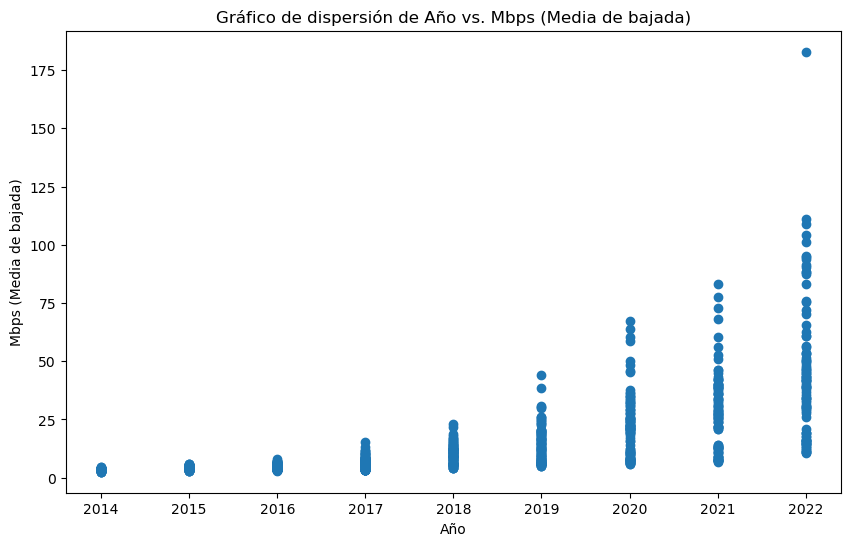

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(velocidad_internet_3['Año'], velocidad_internet_3['Mbps (Media de bajada)'])
plt.title('Gráfico de dispersión de Año vs. Mbps (Media de bajada)')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

Es una posibilidad que ciertas provincias hayan experimentado un crecimiento más rápido que otras, lo que podría influir en la **DISTRIBUCION DE LA MEDIA DE BAJADA DE MBPS** en cada trimestre y año. Esto podría ser el resultado de diferencias en la infraestructura de telecomunicaciones, el desarrollo tecnológico local, el acceso a la inversión en infraestructura digital y otros factores regionales y económicos.

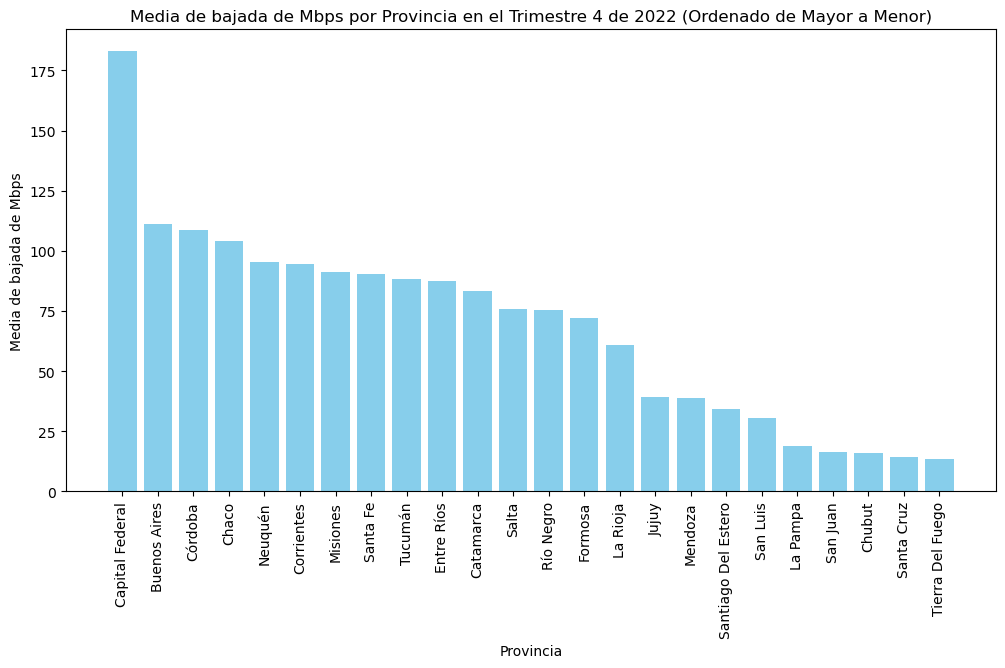

In [68]:
# Ordenar el DataFrame por la media de bajada de Mbps
velocidad_internet_3_sorted = velocidad_internet_3.sort_values('Mbps (Media de bajada)', ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(velocidad_internet_3_sorted['Provincia'], velocidad_internet_3_sorted['Mbps (Media de bajada)'], color='skyblue')
plt.xlabel('Provincia')
plt.ylabel('Media de bajada de Mbps')
plt.title('Media de bajada de Mbps por Provincia en el Trimestre 4 de 2022 (Ordenado de Mayor a Menor)')
plt.xticks(rotation=90)
plt.show()

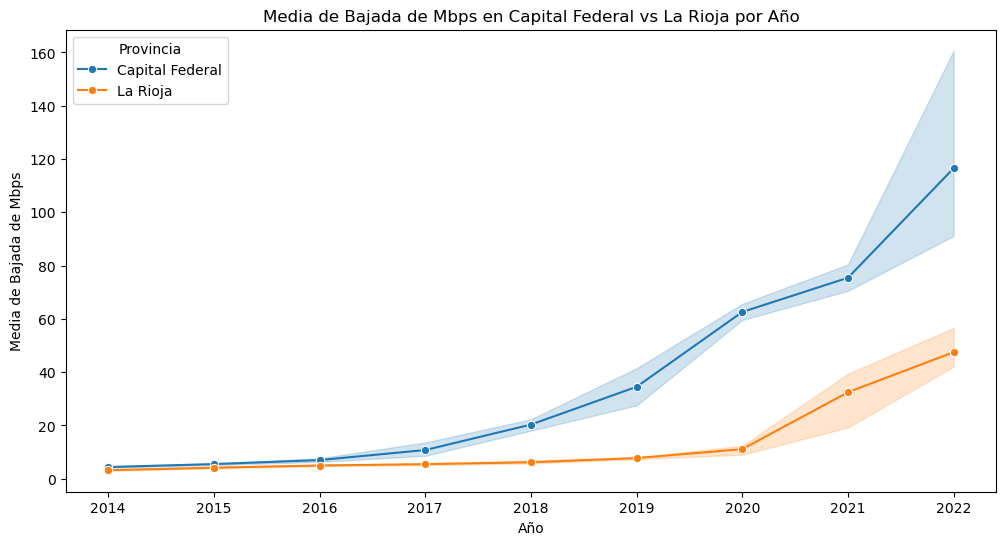

In [71]:
# Filtrar los datos para las provincias de interés
data_cf = velocidad_internet_3[velocidad_internet_3['Provincia'] == 'Capital Federal']
data_lr = velocidad_internet_3[velocidad_internet_3['Provincia'] == 'La Rioja']

# Crear un gráfico de líneas para comparar la media de bajada a lo largo de los trimestres de cada año
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=data_cf, marker='o', label='Capital Federal')
sns.lineplot(x='Año', y='Mbps (Media de bajada)', data=data_lr, marker='o', label='La Rioja')
plt.title('Media de Bajada de Mbps en Capital Federal vs La Rioja por Año')
plt.xlabel('Año')
plt.ylabel('Media de Bajada de Mbps')
plt.legend(title='Provincia', loc='upper left')
plt.show()

Se toma en comparacion el avance tecnologico (velocidad en este caso) de Capital Federal vs una provincia del Interior que se encuentra en la mitad del ranking de velocidad de la Argentina.
La sombra alrededor de cada línea indica el intervalo de confianza, que es una estimación de la variabilidad en la media de los datos.
En general, la velocidad de bajada de internet en la Capital Federal ha experimentado un crecimiento más marcado en comparación con La Rioja a lo largo de los diferentes años y trimestres.

### 4 **accesos_xtecnologia_4**

#### 4.1 Qué contiene cada columna?

Proporciona cantidades x TIPO de conexiones a Internet en provincias de Argentina desde 2014 a 2022.

- **Año:** Año en el que se recopilaron los datos sobre los tipos de conexiones a Internet.
- **Trimestre:** Trimestre al que corresponden los datos recopilados.
- **Provincia:** Nombre de la provincia en la que se recopilaron los datos.
- **ADSL:** Número de conexiones a través de ADSL en la provincia.
- **Cablemodem:** Número de conexiones a través de Cablemodem en la provincia.
- **Fibra óptica:** Número de conexiones a través de Fibra óptica en la provincia.
- **Wireless:** Número de conexiones a través de tecnología inalámbrica en la provincia.
- **Otros:** Número de conexiones a través de otros medios en la provincia.
- **Total:** Total de conexiones a Internet en la provincia.

In [75]:
accesos_xtecnologia_4

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0
...,...,...,...,...,...,...,...,...,...
860,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0
863,2014,1,Tucumán,129717.0,83.0,121.0,13.0,98.0,130032.0


In [87]:
accesos_xtecnologia_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           864 non-null    int64  
 1   Trimestre     864 non-null    int64  
 2   Provincia     864 non-null    object 
 3   ADSL          864 non-null    float64
 4   Cablemodem    864 non-null    float64
 5   Fibra óptica  864 non-null    float64
 6   Wireless      864 non-null    float64
 7   Otros         864 non-null    float64
 8   Total         864 non-null    float64
dtypes: float64(6), int64(2), object(1)
memory usage: 67.5+ KB


La ultima fila no corresponde a datos de la tabla, procedo a eliminarla

In [76]:
accesos_xtecnologia_4 = accesos_xtecnologia_4.drop(accesos_xtecnologia_4.index[-1])

No hay nulos

#### 4.2 Revisamos que los registros para cada provincia esten ok, 24 provincias con 36 trimestres para cada una. del 2014 al 2022. 

In [79]:
cantidad_valores_unicos_4 = accesos_xtecnologia_4['Provincia'].nunique()
# Imprimir la cantidad de valores únicos
print(cantidad_valores_unicos_4)

24


In [80]:
valoresunicos_4=accesos_xtecnologia_4['Provincia'].value_counts()
valoresunicos_4

Provincia
Buenos Aires           36
Capital Federal        36
Tierra Del Fuego       36
Santiago Del Estero    36
Santa Fe               36
Santa Cruz             36
San Luis               36
San Juan               36
Salta                  36
Río Negro              36
Neuquén                36
Misiones               36
Mendoza                36
La Rioja               36
La Pampa               36
Jujuy                  36
Formosa                36
Entre Ríos             36
Corrientes             36
Córdoba                36
Chubut                 36
Chaco                  36
Catamarca              36
Tucumán                36
Name: count, dtype: int64

Hay 24 provincias ->  OK  
36 trimestres cada una -> OK

#### 4.3 Graficos de análisis

Al querer hacer algunos graficos detecto que el año 2019 tiene una entrada diferente ('2019 *')para trimestres 1, 2 y 3. Que significa que la fuente original es diferente a la del resto del dataset.
DEFINO que en este caso nos es indistinto para el analisis de este proyecto. NUESTRA fuente de datos es esta base de datos por lo tanto la tomamos OK.
Procedo a modificar los '2019 *' -> '2019'

In [82]:
# Reemplazar '2019 *' con '2019' en la columna 'Año'
accesos_xtecnologia_4['Año'] = accesos_xtecnologia_4['Año'].replace('2019 *', '2019')

# Asegurarse de que la columna 'Año' sea de tipo numérico
accesos_xtecnologia_4['Año'] = pd.to_numeric(accesos_xtecnologia_4['Año'])

# Comprobar si '2019 *' fue reemplazado por '2019'
print(accesos_xtecnologia_4['Año'].unique())

[2022 2021 2020 2019 2018 2017 2016 2015 2014]


In [84]:
# Reemplazar '1 *' con '1', '2 *' con '2', y '3 *' con '3' en la columna 'Trimestre'
accesos_xtecnologia_4['Trimestre'] = accesos_xtecnologia_4['Trimestre'].replace({'1 *': '1', '2 *': '2', '3 *': '3'})

# Asegurarse de que la columna 'Trimestre' sea de tipo numérico
accesos_xtecnologia_4['Trimestre'] = pd.to_numeric(accesos_xtecnologia_4['Trimestre'])

# Comprobar si '1 *', '2 *' y '3 *' fueron reemplazados por '1', '2' y '3' respectivamente
print(accesos_xtecnologia_4['Trimestre'].unique())

[4 3 2 1]


<Figure size 1200x600 with 0 Axes>

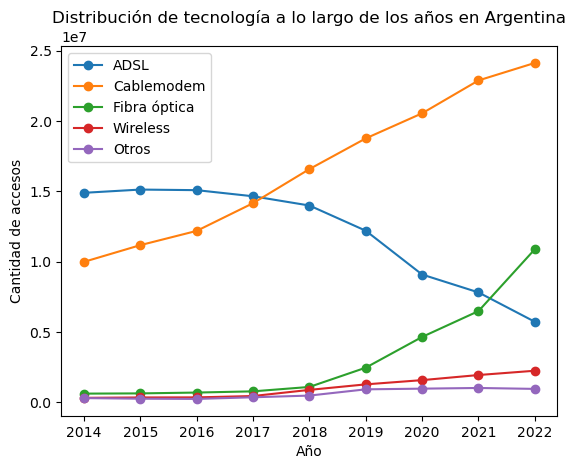

In [88]:
# Crear un gráfico de líneas para mostrar la distribución de la tecnología a lo largo de los años
plt.figure(figsize=(12, 6))
accesos_xtecnologia_4.groupby('Año')[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().plot(kind='line', marker='o')
plt.title('Distribución de tecnología a lo largo de los años en Argentina')
plt.xlabel('Año')
plt.ylabel('Cantidad de accesos')
plt.show()

El aumento en la cantidad de accesos a tecnologías como Cablemódem, Fibra óptica y Wireless en Argentina refleja una mayor adopción de internet y servicios de telecomunicaciones, así como mejoras en la infraestructura tecnológica a lo largo del tiempo.

El predominio del Cablemódem en Argentina puede estar relacionado con la infraestructura previamente establecida, la asequibilidad para los consumidores, la amplia disponibilidad geográfica y la familiaridad generalizada. Estos factores han facilitado su adopción en comparación con otras tecnologías de banda ancha. Sin embargo, es importante considerar que las tendencias pueden cambiar con el tiempo a medida que se desarrollan y expanden otras infraestructuras de conectividad y la tecnología evoluciona.

De hecho podemos observar la pendiente de Fibra óptica como avanza mucho más abruptamente en el último año comparado al cablemodem.

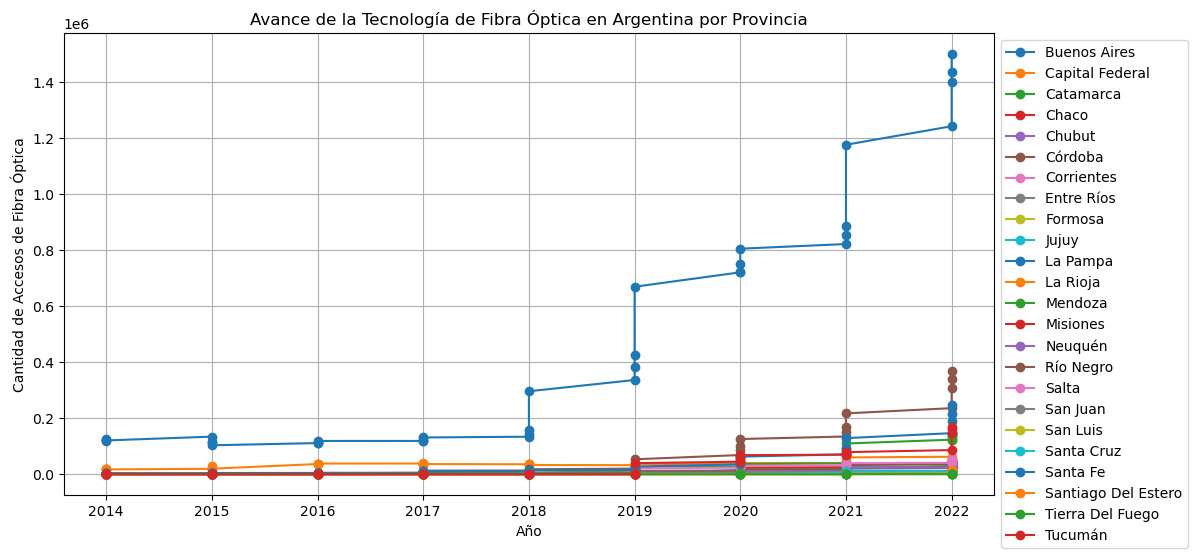

In [91]:
# Crear un gráfico de líneas para mostrar el avance de la tecnología de fibra óptica en Argentina por provincia a lo largo de los años
plt.figure(figsize=(12, 6))
for provincia in data_fibra_optica['Provincia'].unique():
    data_provincia = data_fibra_optica[data_fibra_optica['Provincia'] == provincia]
    plt.plot(data_provincia['Año'], data_provincia['Fibra óptica'], label=provincia, marker='o')

plt.title('Avance de la Tecnología de Fibra Óptica en Argentina por Provincia')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accesos de Fibra Óptica')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.grid()
plt.show()

Acá arriba reflejamos el avance exponencial desde 2018, la inversion y expansion de la Fibra Optica impacta de lleno en Buenos Aires que maneja la mayor cantidad de población.

Proporciona cantidades x VELOCIDAD de Internet en diferentes categorías de ancho de banda en provincias de Argentina. 2014 a 2022.

- **Año:** Año en el que se recopilaron los datos de la distribución de la velocidad de Internet.
- **Trimestre:** Trimestre al que corresponden los datos recopilados.
- **Provincia:** Nombre de la provincia en la que se recopilaron los datos.
- **HASTA 512 kbps:** Número de conexiones con velocidad de hasta 512 kilobits por segundo en la provincia.
- **+ 512 Kbps - 1 Mbps:** Número de conexiones con velocidad de 512 kilobits por segundo a 1 megabit por segundo en la provincia.
- **+ 1 Mbps - 6 Mbps:** Número de conexiones con velocidad de 1 megabit por segundo a 6 megabits por segundo en la provincia.
- **+ 6 Mbps - 10 Mbps:** Número de conexiones con velocidad de 6 megabits por segundo a 10 megabits por segundo en la provincia.
- **+ 10 Mbps - 20 Mbps:** Número de conexiones con velocidad de 10 megabits por segundo a 20 megabits por segundo en la provincia.
- **+ 20 Mbps - 30 Mbps:** Número de conexiones con velocidad de 20 megabits por segundo a 30 megabits por segundo en la provincia.
- **+ 30 Mbps:** Número de conexiones con velocidad de más de 30 megabits por segundo en la provincia.
- **OTROS:** Otras categorías de conexiones a Internet en la provincia.
- **Total:** Total de conexiones a Internet en la provincia.

### 5 **ingresos_5**

#### 5.1 Qué contiene cada columna?

Proporciona ingresos totales en miles de pesos en trimestres de 2014 a 2022, de las empresas que brindan el servicio en Argentina.

- **Año:** Año al que corresponde el registro de ingresos.
- **Trimestre:** Trimestre en el que se registraron los ingresos.
- **Ingresos (miles de pesos):** Cantidad de ingresos registrados en miles de pesos en el trimestre y año especificados.
- **Periodo:** Período específico al que corresponde el registro de ingresos.

In [112]:
ingresos_5

,Año,Trimestre,Ingresos (miles de pesos),Periodo
0,2022,4,72443482.989,Oct-Dic 2022
1,2022,3,64086784.331,Jul-Sept 2022
2,2022,2,60419500.623,Abr-Jun 2022
3,2022,1,55219313.015,Ene-Mar 2022
4,2021,4,45467887.165,Oct-Dic 2021
5,2021,3,42999944.293,Jul-Sept 2021
6,2021,2,38239666.634,Abr-Jun 2021
7,2021,1,36676371.362,Ene-Mar 2021
8,2020,4,33539702.716,Oct-Dic 2020
9,2020,3,31997444.531,Jul-Sept 2020


In [96]:
ingresos_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.2+ KB


In [98]:
ingresos_5['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014])

In [100]:
ingresos_5['Trimestre'].unique()

array([4, 3, 2, 1])

No hay nulos

#### 5.2 Gráficos de análisis

Primero quitamos la notacion cientifica para visualizar mejor el valor del ingreso en pesos.

In [110]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [114]:
ingresos_5.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,36.000,36.000,36.000
mean,2018.000,2.500,21938421.077
std,2.619,1.134,19301893.305
min,2014.000,1.000,2984054.209
25%,2016.000,1.750,6384891.670
50%,2018.000,2.500,14865224.077
75%,2020.000,3.250,32461782.673
max,2022.000,4.000,72443482.989


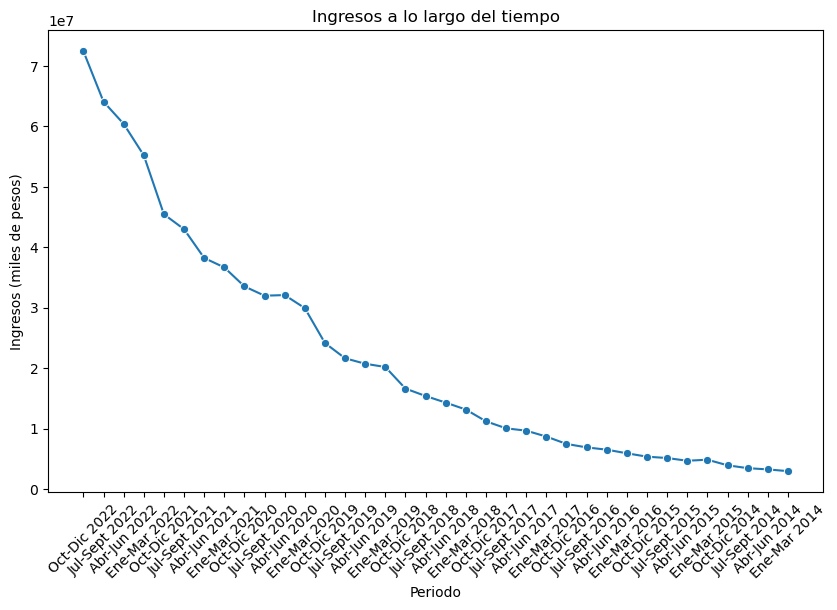

In [118]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Periodo', y='Ingresos (miles de pesos)', data=ingresos_5, marker='o')
plt.title('Ingresos a lo largo del tiempo')
plt.xlabel('Periodo')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

Se visualiza un crecimiento en pesos sostenido a lo largo de los años.   
Tiene una curva exponencial que puede deberse a la devaluación de la moneda. Deberiamos analizar en moneda dura como lo es el USD.

### 6 **mapa_conectividad_6**

#### 6.1 Qué contiene cada columna?

Proporciona tipo de conectividad x ubicación geográfica en Argentina.

- **Provincia:** Provincia a la que pertenece la localidad.
- **Partido:** Partido al que pertenece la localidad.
- **Localidad:** Nombre de la localidad específica.
- **Población:** Número de habitantes en la localidad.
- **ADSL:** Disponibilidad de conexión a Internet ADSL en la localidad.
- **Cablemódem:** Disponibilidad de conexión a Internet por cablemódem en la localidad.
- **Dial Up:** Disponibilidad de conexión a Internet Dial Up en la localidad.
- **Fibra óptica:** Disponibilidad de conexión a Internet de fibra óptica en la localidad.
- **Satelital:** Disponibilidad de conexión a Internet vía satélite en la localidad.
- **Wireless:** Disponibilidad de conexión a Internet inalámbrica en la localidad.
- **Telefonía Fija:** Disponibilidad de servicio de telefonía fija en la localidad.
- **3G:** Disponibilidad de conexión a Internet 3G en la localidad.
- **4G:** Disponibilidad de conexión a Internet 4G en la localidad.
- **Link:** Enlace a datos geográficos de la localidad.
- **Latitud:** Coordenada de latitud de la localidad.
- **Longitud:** Coordenada de longitud de la localidad.

In [121]:
mapa_conectividad_6.head()

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
0,BUENOS AIRES,9 de Julio,Alfredo Demarchi (Est. Facundo Quiroga),1853,SI,--,--,--,--,--,SI,SI,SI,6588010.000,-35.293,-61.407
1,BUENOS AIRES,9 de Julio,Carlos María Naón,497,--,--,--,--,--,--,SI,SI,SI,6588020.000,-35.239,-60.825
2,BUENOS AIRES,9 de Julio,Dudignac,2670,--,--,SI,--,--,SI,SI,SI,SI,6588040.000,-35.651,-60.710
3,BUENOS AIRES,9 de Julio,La Aurora (Est. La Niña),531,--,--,--,--,--,--,--,--,SI,6588050.000,-35.408,-61.211
4,BUENOS AIRES,9 de Julio,Manuel B. Gonnet (Est. French),748,SI,--,--,SI,--,--,SI,SI,SI,6588060.000,-35.520,-60.999


In [120]:
mapa_conectividad_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4311 entries, 0 to 4310
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4311 non-null   object 
 1   Partido         4311 non-null   object 
 2   Localidad       4311 non-null   object 
 3   Población       4311 non-null   int64  
 4   ADSL            4311 non-null   object 
 5   Cablemódem      4311 non-null   object 
 6   Dial Up         4311 non-null   object 
 7   Fibra óptica    4311 non-null   object 
 8   Satelital       4311 non-null   object 
 9   Wireless        4311 non-null   object 
 10  Telefonía Fija  4311 non-null   object 
 11  3G              4311 non-null   object 
 12  4G              4311 non-null   object 
 13  Link            4299 non-null   float64
 14  Latitud         4311 non-null   float64
 15  Longitud        4311 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 539.0+ KB


In [125]:
nulos_6 = mapa_conectividad_6[mapa_conectividad_6['Link'].isna()] 
nulos_6

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
3112,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Belgrano Ii,0,--,--,--,--,--,--,--,--,--,NaN,-77.874,-34.627
3113,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Brown,0,--,--,--,--,--,--,--,--,--,NaN,-64.895,-62.871
3114,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Carlini,0,--,--,--,--,--,--,--,--,--,NaN,-62.238,-58.668
3115,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Esperanza,0,--,--,--,--,--,--,--,--,SI,NaN,-63.397,-56.997
3116,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Marambio,0,--,--,--,--,--,--,--,SI,SI,NaN,-64.241,-56.625
3117,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Matienzo,0,--,--,--,--,--,--,--,--,--,NaN,-64.976,-60.071
3118,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base Orcadas,0,--,--,--,--,--,--,--,--,--,NaN,-60.738,-44.738
3119,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Base San Martin,0,--,--,--,--,--,--,--,--,--,NaN,-68.130,-67.101
3120,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Camara,0,--,--,--,--,--,--,--,--,--,NaN,-62.594,-59.919
3121,TIERRA DEL FUEGO,ANTARTIDA ARGENTINA,Destacamento Decepcion,0,--,--,--,--,--,--,--,--,--,NaN,-62.975,-60.698


Observamos las lineas con LINK nulo.   
No tomamos ninguna medida, no utilizaremos esta columna para análisis.

In [126]:
poblacion0_6 = mapa_conectividad_6[mapa_conectividad_6['Población']==0]

In [127]:
poblacion0_6

,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
21,BUENOS AIRES,Bahía Blanca,Grunbein,0,--,--,--,--,--,--,--,SI,SI,6056020.000,-38.747,-62.189
22,BUENOS AIRES,Bahía Blanca,Ingeniero White,0,--,--,--,SI,SI,--,--,SI,SI,6056020.000,-38.779,-62.263
25,BUENOS AIRES,General Pueyrredón,Estacion Camet,0,--,--,--,--,--,--,--,SI,SI,6357090.000,-37.889,-57.600
28,BUENOS AIRES,General Pueyrredón,Punta Mogotes,0,--,--,--,--,--,--,--,SI,SI,6351020.000,-38.083,-57.586
30,BUENOS AIRES,General Rodríguez,Barrio Ruta 24 Kilómetro 10,0,--,--,--,SI,--,--,--,SI,SI,6364030.000,-34.688,-58.957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,SAN JUAN,Angaco,Villa El Salvador,0,--,--,--,--,--,SI,--,SI,SI,70014010.000,-31.445,-68.418
4277,SAN JUAN,Angaco,Villa Sefair (Talacasto),0,--,--,--,--,--,--,--,--,--,70014010.000,-31.444,-68.422
4278,SAN JUAN,Calingasta,Barreal,0,--,--,--,--,SI,--,--,SI,SI,70021020.000,-31.652,-69.480
4282,SAN JUAN,Calingasta,Villa Pituil,0,--,--,--,--,--,--,--,--,--,70021020.000,-31.653,-69.482


Observamos una gran cantidad de localidades sin Población.   
Estos datos se deberían completar con otra base de datos.  
NO los eliminamos porque necesito saber las localidades y su tecnología 

In [136]:
duplicates_localidad_6 = mapa_conectividad_6[mapa_conectividad_6.duplicated(subset=['Provincia', 'Partido', 'Localidad'], keep=False)]


In [137]:
duplicates_localidad_6.sort_values('Provincia')


,Provincia,Partido,Localidad,Población,ADSL,Cablemódem,Dial Up,Fibra óptica,Satelital,Wireless,Telefonía Fija,3G,4G,Link,Latitud,Longitud
352,BUENOS AIRES,La Plata,ruta del sol,0,SI,--,--,SI,--,--,SI,SI,SI,6441050.000,-34.944,-58.173
353,BUENOS AIRES,La Plata,ruta del sol,2312,SI,--,--,SI,--,--,SI,SI,SI,6441050.000,-34.944,-58.173
2417,ENTRE RIOS,Colón,Hocker,0,--,--,--,--,--,--,--,--,SI,30008100.000,-32.087,-58.342
2418,ENTRE RIOS,Colón,Hocker,98,--,--,--,--,SI,SI,--,--,SI,30008100.000,-32.087,-58.342
3812,ENTRE RIOS,Paraná,El Ramblón,0,--,--,--,--,--,--,--,--,SI,30084095.000,-31.848,-60.093
3813,ENTRE RIOS,Paraná,El Ramblón,0,--,--,--,--,--,SI,--,--,SI,30084095.000,-31.848,-60.093
2862,LA RIOJA,Sanagasta,Villa Sanagasta,2275,--,--,--,--,--,--,--,SI,SI,46126010.000,-29.306,-67.041
2863,LA RIOJA,Sanagasta,Villa Sanagasta,0,--,SI,--,SI,SI,SI,SI,SI,SI,46126010.000,-29.306,-67.041
3441,TUCUMAN,Cruz Alta,Lastenia,0,--,--,--,--,--,--,--,SI,SI,90014090.000,-26.862,-65.163
3442,TUCUMAN,Cruz Alta,Lastenia,0,--,--,--,--,--,--,--,SI,SI,90014090.000,-26.850,-65.129


Vemos algunas localidades duplicadas, al ser pocas procedemos a manualmente eliminar las que no nos sirven y dejar la informacion relevante:

In [138]:
mapa_conectividad_6.loc[2863, 'Población'] = 2275

In [139]:
# Eliminar las filas no deseadas
indices_eliminar = [352, 2417, 3812, 2862, 3441]
mapa_conectividad_6 = mapa_conectividad_6.drop(indices_eliminar)


#### 6.2 Gráficos de análisis

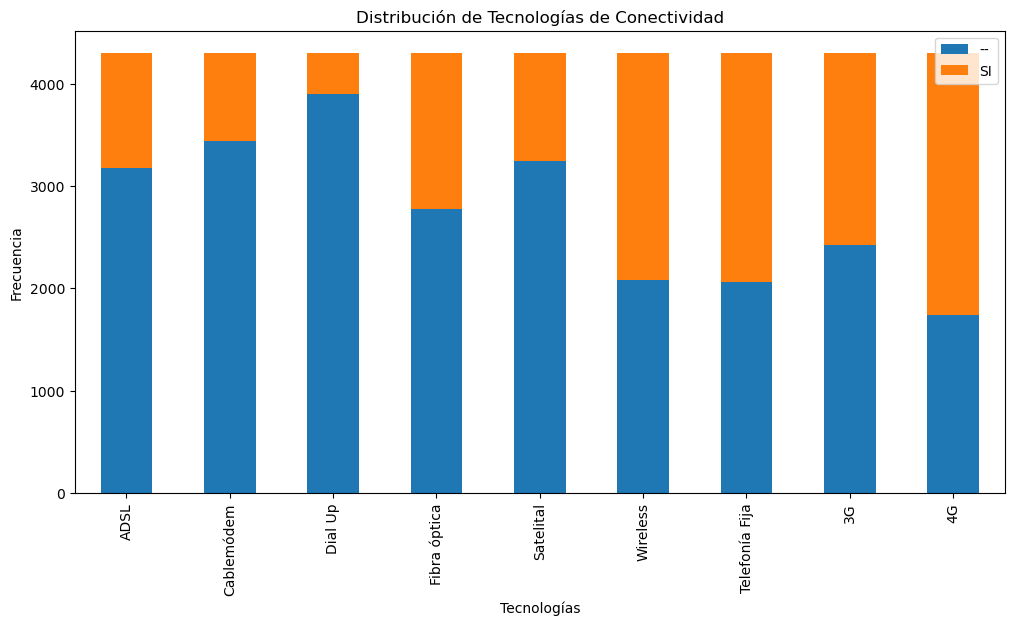

In [140]:
# Gráfico de conteo de tipos de tecnología de conectividad
tech_cols = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
tech_counts = mapa_conectividad_6[tech_cols].apply(pd.Series.value_counts)
tech_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de Tecnologías de Conectividad')
plt.xlabel('Tecnologías')
plt.ylabel('Frecuencia')
plt.show()

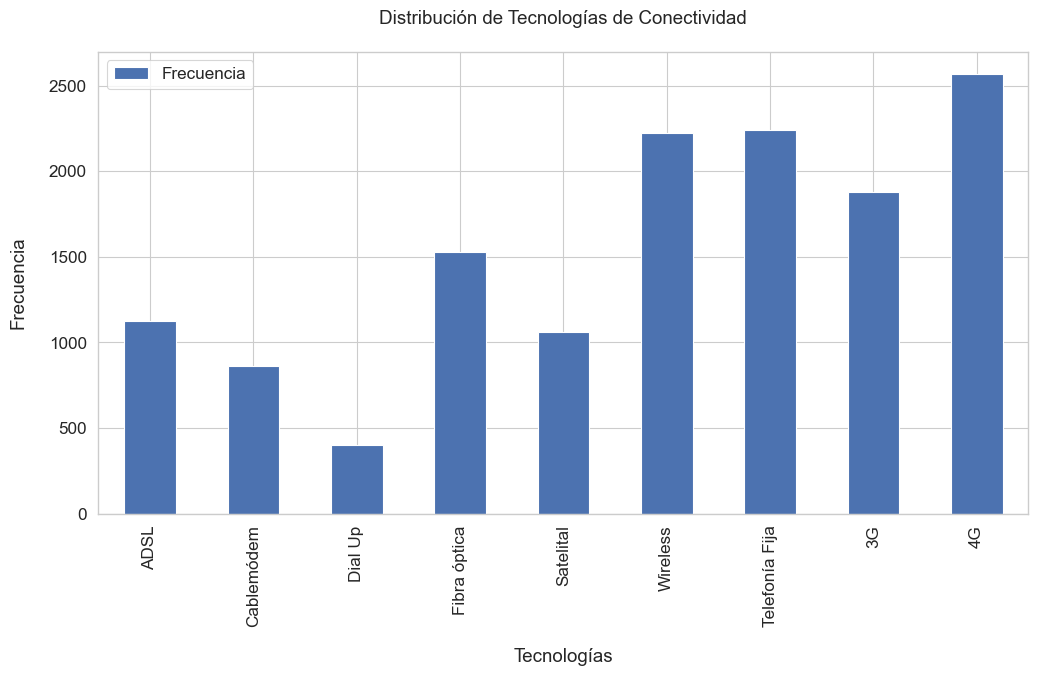

In [143]:
# Configurar el estilo y el contexto de Seaborn
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.4)

# Gráfico de conteo de tipos de tecnología de conectividad
tech_cols = ['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']
tech_counts = mapa_conectividad_6[tech_cols].apply(lambda x: x[x == 'SI'].count())

# Personalizar el gráfico y agregar etiquetas
fig, ax = plt.subplots(figsize=(12, 6))
tech_counts.plot(kind='bar', ax=ax, label='Frecuencia')
plt.title('Distribución de Tecnologías de Conectividad', pad=20)
plt.xlabel('Tecnologías', labelpad=15)
plt.ylabel('Frecuencia', labelpad=15)
plt.legend()
plt.show()

Observamos que el 4G es la tecnología que más cantidad de localidades abarca.

## Exportamos a CSV para trabajar los df en Tableau

In [144]:
cantidadxprovi_1.to_csv('cantidadxprovi_1.csv', index=False)
penetracion_hogares_2.to_csv('penetracion_hogares_2.csv', index=False)
velocidad_internet_3.to_csv('velocidad_internet_3.csv', index=False)
accesos_xtecnologia_4.to_csv('accesos_xtecnologia_4.csv', index=False)
ingresos_5.to_csv('ingresos_5.csv', index=False)
mapa_conectividad_6.to_csv('mapa_conectividad_6.csv', index=False)
